In [6]:
import pandas as pd 

#해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
#다운로드와 동시에 Pandas에 excel 파일이 load가 되는 구조입니다.
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#stock_code.head()

# 데이터에서 정렬이 따로 필요하지는 않지만 테스트겸 Pandas sort_values를 이용하여 정렬을 시도해봅니다.
stock_code.sort_values(['상장일'], ascending=True)

# 필요한 것은 "회사명"과 "종목코드" 이므로 필요없는 column들은 제외
stock_code = stock_code[['회사명', '종목코드']] 

# 한글 컬럼명을 영어로 변경 
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
#stock_code.head()

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
stock_code.code = stock_code.code.map('{:06d}'.format) 

In [16]:
import requests

# LG화학의 일별 시세 url 가져오기 
company='현대자동차' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거


df=pd.DataFrame()
for page in range(1,39):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}  
    res = requests.get(url,headers=header)
    df = df.append(pd.read_html(res.text, header=0)[0], ignore_index=True)

# df.dropna()를 이용해 결측값 있는 행 제거
df = df.dropna()    
# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 
    
df.to_csv('a1.csv', encoding='utf-8-sig', index=False)
df
print('저장완료')

저장완료


In [28]:
df

,date,close,diff,open,high,low,volume
568,2019-12-30,120500,0,120500,121500,120000,467794
567,2020-01-02,118000,2500,121000,121000,118000,556532
566,2020-01-03,116000,2000,118500,119000,115000,1145187
565,2020-01-06,116000,0,116000,117000,115500,334574
564,2020-01-07,115500,500,116500,117000,115500,674196
...,...,...,...,...,...,...,...
5,2021-07-06,236000,0,236500,238000,235500,497009
4,2021-07-07,232000,4000,235000,235500,232000,1122107
3,2021-07-08,229500,2500,232000,233000,229000,1241792
2,2021-07-09,226000,3500,227500,229000,225000,1137429


In [17]:
!pip install plotly
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px

# %matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

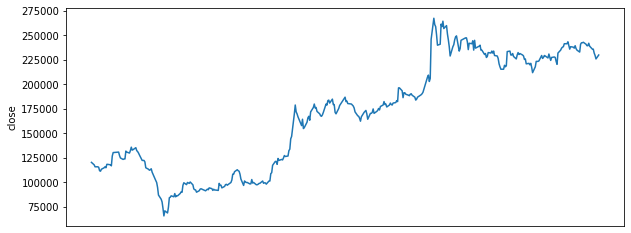

In [18]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.xlabel('')
plt.ylabel('close')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig(company + ".png")
plt.show()

In [19]:
fig = px.line(df, x='date', y='close', title='{}의 종가(close) Time Series'.format(company))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()